<a href="https://colab.research.google.com/github/Yuvarajm-19/boston-house-price-predictio/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install pandas
import pandas as pd

In [49]:
!pip install -U scikit-learn
!pip install --user scikit-learn
import sklearn
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline


In [22]:
!pip install matplotlib

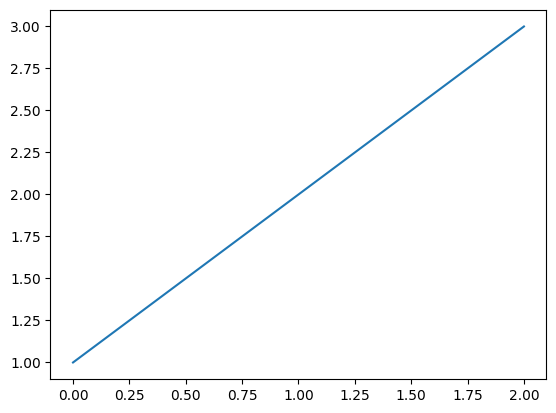

In [23]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3])
plt.show()

In [24]:
# Verify library installations
try:
    import numpy as np
    import pandas as pd
    from sklearn import linear_model
    import matplotlib.pyplot as plt
    print("All libraries imported successfully!")
except ImportError as e:
    print(f"Error: {e}")

All libraries imported successfully!


In [25]:
import numpy as np
import numpy as np

# Create a numpy array
array = np.array([1, 2, 3, 4, 5])
print(array)  # Output: [1 2 3 4 5]

[1 2 3 4 5]


In [26]:
import matplotlib.pyplot as plt


In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1


In [29]:

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [30]:
data = pd.read_csv('/content/drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [31]:
data.shape

(506, 14)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [44]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
data1=data.loc[:,['LSTAT','MEDV']]
data1.head(3)


,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7


<Axes: >

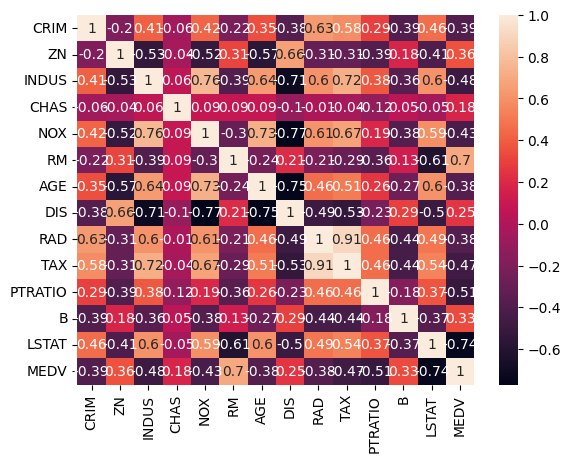

In [51]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


In [53]:
z = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z > 3))


(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

<Axes: xlabel='MEDV', ylabel='Count'>

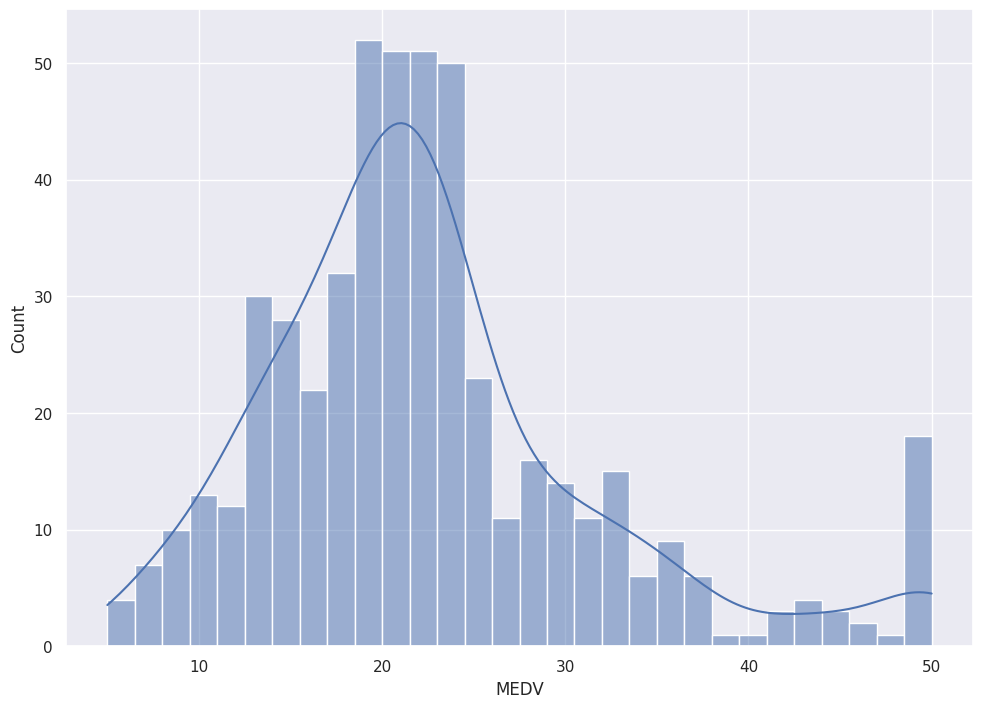

In [58]:
sns.histplot(data['MEDV'], bins=30, kde=True)


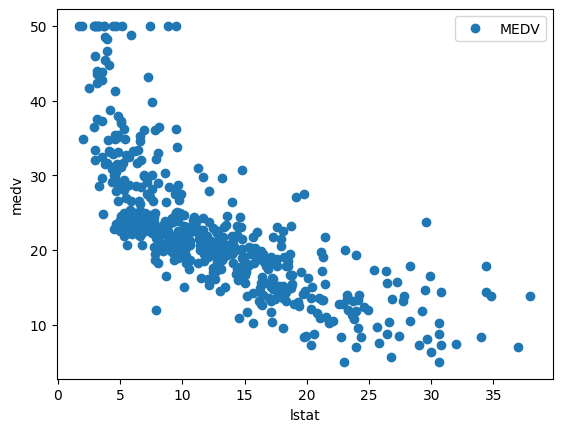

In [33]:
import matplotlib.pyplot as plt
data1.plot(x='LSTAT',y='MEDV',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [34]:
X=pd.DataFrame(data1['LSTAT'])
y=pd.DataFrame(data1['MEDV'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
print(regressor.intercept_)

[34.12654201]


In [38]:
print(regressor.coef_)

[[-0.913293]]


In [39]:
y_pred=regressor.predict(X_test)


In [40]:
y_pred.shape,y_test.shape

((102, 1), (102, 1))

In [41]:
from sklearn import metrics
import numpy as np
print("Mean Absolute Error :" , metrics.mean_absolute_error(y_test,y_pred))
print("Meas Squared Error :" , metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :" , metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error : 4.692198305736312
Meas Squared Error : 43.919849155153074
Root Mean Squared Error : 43.919849155153074


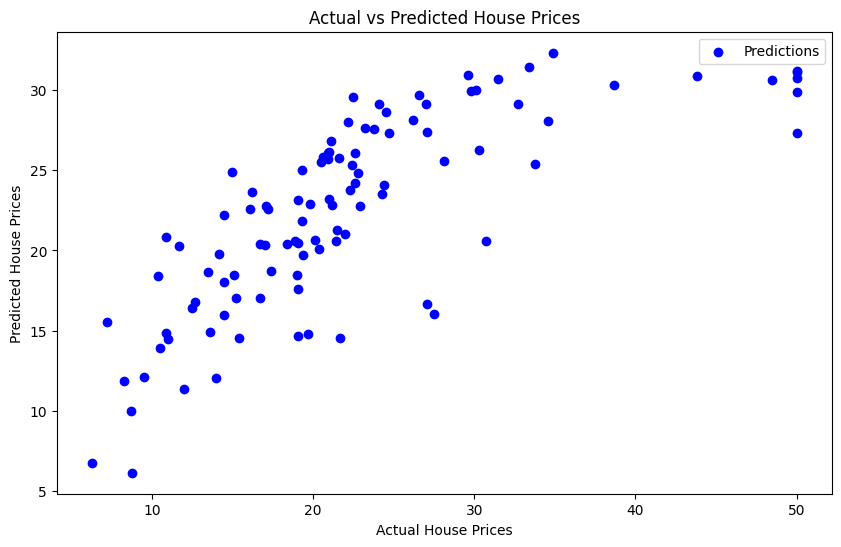

In [42]:

# Visualize predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

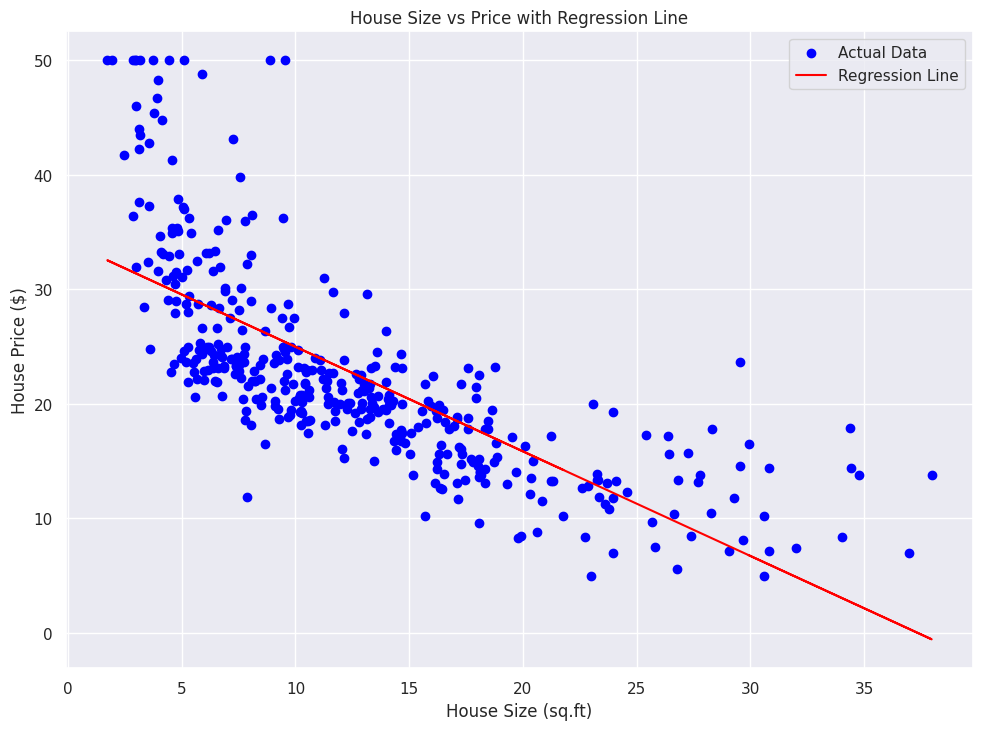

Conclusion: The linear regression model predicts house prices based on LSTAT. To improve accuracy, consider using more features (e.g., RM, AGE) or advanced models like Random Forest or XGBoost.


In [59]:
import matplotlib.pyplot as plt
# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'size' and 'price' with your actual column names
# Predict values using the training data
predicted_prices = regressor.predict(X_train)

# Plot the regression line
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_train, predicted_prices, color='red', label='Regression Line')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price ($)')
plt.title('House Size vs Price with Regression Line')
plt.legend()
plt.show()
# Conclusion & Improvement Suggestions
print("Conclusion: The linear regression model predicts house prices based on LSTAT. To improve accuracy, consider using more features (e.g., RM, AGE) or advanced models like Random Forest or XGBoost.")
